# Elliot Porter - EE263 - HW2 

In [1]:
#preamble
using JSON
using LinearAlgebra
using Statistics
using Printf
using Colors
using Plots

### **2.160 — Some Matrices from Signal Processing**

We consider $x \in \mathbb{R}^n$ as a signal, with $x_i$ the (scalar) value of the signal at discrete time period $i$, for $i = 1, \ldots, n$.  
Below we describe several transformations of the signal $x$, that produce a new signal $y$ (whose dimension varies).  
For each one, find a matrix $A$ for which $y = A x$.

**(a)** 2× up-conversion with linear interpolation.  
We take $y \in \mathbb{R}^{2n - 1}$.  
For $i$ odd, $y_i = x_{(i+1)/2}$.  
For $i$ even, $y_i = (x_{i/2} + x_{(i/2) + 1}) / 2$.  
Roughly speaking, this operation doubles the sample rate, inserting new samples in between the original ones using linear interpolation.

**(b)** 2× down-sampling.  
We assume here that $n$ is even, and take $y \in \mathbb{R}^{n/2}$, with $y_i = x_{2i}$.

**(c)** 2× down-sampling with averaging.  
We assume here that $n$ is even, and take $y \in \mathbb{R}^{n/2}$, with $y_i = (x_{2i-1} + x_{2i}) / 2$.

---

### **P2.160 Analysis**

### A - 2x up-conversion with linear interpolation
--- 
We know to construct the A matrix that every row $i$ has to satisfy the even/odd conditions. 
We know that each column $j$ has to align with the conditions set with $y_j \rightarrow x_j$

So every odd row will be zeros except for 1 on the j-th column (j-th entry in y) so $A[1,:]$ would be  $[1, 0, 0, ... 0]$ for $j=1$
and $A[3, :]$ would be $[0, 0, 1, 0, ... 0]$ for $j=3$

Now for even j indices of row i, you take the average jth and the (j+1)th items of x. where $A[2,:]$  would be $[0, 1/2, 1/2, 0, ... 0$ for $j=2$ and $A[4,:]$ would be $[0, \frac{1}{2}, \frac{1}{2}, ... 0]$ 

So the overall $A: \mathbb{R}^{(2n-1) \times n}$ matrix would look like:
$$
 \quad
A =
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 \\
\frac{1}{2} & \frac{1}{2} & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & \frac{1}{2} & \frac{1}{2} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \cdots & 0 & 1
\end{bmatrix}.
$$
### B - 2x Down Sampling 
--- 
So since we are just downsampling. We are cutting it in half the matrix, so $A: \mathbb{R}^{\frac{n}{2} \times n}$

We know that $y_j = x_{2i}$ So for the $i$th row of A we know that it will be a vector of zeros except for at the $(2i)$ index. 
So for the first row of A:  $A[1, :] = [0, 1, 0, 0, ... 0] $

And for the nth row of A: $$A[n, :] = [0, 0, 0, ... 1, 0] \text{ where 1 is the }  (2n) \text{-th entry in the $n$th row}$$

In short 
$$A[n, 2n]= 1 \text{ else: } A[i,j] = 0, \text{ where } j \neq 2i $$
So A will look like:
$$
A =
\begin{bmatrix}
0 & 1 & 0 & 0 & \cdots & 0 \\
0 & 0 & 0 & 1 & \cdots & 0 \\
\vdots & & & & \ddots & \vdots \\
0 & 0 & \cdots & 0 & 1
\end{bmatrix}.
$$
### C - 2x downsampling w averaging

Assuming $n$ even, $y_i = \frac{1}{2}(x_{2i-1} + x_{2i})$.  


Now we are combining the two previous above. 
Since $x: \mathbb{R}^n$ and $y: \mathbb{R}^{n/2}$
A will hence be: $A:\mathbb{R}^{(n/2) \times n}$
So for the example of the $i=1$ and $i=3$ the entries of $A$ will behave as such:
$$A[1, :] = \frac{1}{2} [1, 1, 0, ... 0]$$
$$A[3, :] = \frac{1}{2} [0, 0, 0, 0, 1, 1, ... 0]$$

$$
A =
\frac{1}{2}
\begin{bmatrix}
1 & 1 & 0 & 0 & \cdots & 0 \\
0 & 0 & 1 & 1 & \cdots & 0 \\
\vdots & & & & \ddots & \vdots \\
0 & 0 & \cdots & 1 & 1
\end{bmatrix}.
$$

In [2]:
# now lets write the code for getting the three kinds of A matrices
function is_even(i::Int)
    if i%2 == 0
        return true
    end
    return false
end
function is_odd(i::Int)
    if i%2 == 1
        return true
    end
    return false
end


function two_x_upconversion(n::Int)
    A = zeros(2*n - 1, n)
    for i in 1:(2*n-1)
        if is_odd(i)
            idx = div(i +1,2)
            A[i, idx] = 1.0
        end
        if is_even(i)
            idx = div(i, 2)
            A[i, idx] = 0.5
            A[i, idx + 1] = 0.5
        end
    end
    return A
end

function two_times_downsample(n::Int)
    @assert iseven(n) "n must be even for downsampling"

    A = zeros(div(n, 2), n)
    for i in 1: div(n,2)
        idx = 2*i
        A[i, idx] = 1.0
    end
    return A
end

function average_downsample(n::Int)
    @assert iseven(n) "n must be even for downsampling"
    A = zeros(div(n,2), n)
    for i in 1: div(n,2)
        A[i, 2i] = 0.5
        A[i, 2i - 1] = 0.5
    end
    return A
end

n = 4
x = collect(1:n)
A_2x = two_x_upconversion(n)
A_down = two_times_downsample(n)
A_avg_down = average_downsample(n)
println("A for two times up conversion")
display(A_2x)
println("A for down conversion")
display(A_down)
println("A for average down conversion")
display(A_avg_down)
println("y calculations \n")
println("x vector:, \n", x)
y_2x = A_2x *x
println("y_2x intersample: \n", y_2x)
y_down = A_down * x
println("y_downsampled: \n", y_down)
y_avg_down = A_avg_down * x
println("y_avg_downsampled: \n", y_avg_down)



A for two times up conversion


7×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 0.5  0.5  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.5  0.5  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.5  0.5
 0.0  0.0  0.0  1.0

A for down conversion


2×4 Matrix{Float64}:
 0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0

A for average down conversion


2×4 Matrix{Float64}:
 0.5  0.5  0.0  0.0
 0.0  0.0  0.5  0.5

y calculations 

x vector:, 
[1, 2, 3, 4]
y_2x intersample: 
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
y_downsampled: 
[2.0, 4.0]
y_avg_downsampled: 
[1.5, 3.5]


### **3.250 — Color Perception**

Human color perception is based on the responses of three different types of color light receptors, called cones.  
The three types of cones have different spectral-response characteristics, and are called L, M, and S because they respond mainly to long, medium, and short wavelengths, respectively.  
In this problem we divide the visible spectrum into 20 bands, and model the cones’ responses as follows:

$$
L_{\text{cone}} = \sum_{i=1}^{20} l_i p_i, \quad
M_{\text{cone}} = \sum_{i=1}^{20} m_i p_i, \quad
S_{\text{cone}} = \sum_{i=1}^{20} s_i p_i,
$$

where $p_i$ is the incident power in the $i$th wavelength band, and $l_i, m_i, s_i$ are nonnegative constants that describe the spectral responses of the different cones.  
The perceived color is a complex function of the three cone responses, i.e., the vector $(L_{\text{cone}}, M_{\text{cone}}, S_{\text{cone}})$, with different cone response vectors perceived as different colors.  
(Actual color perception is a bit more complicated than this, but the basic idea is right.)

**(a)** *Metamers.*  
When are two light spectra, $p$ and $\tilde{p}$, visually indistinguishable?  
(Visually identical lights with different spectral power compositions are called metamers.)

**(b)** *Visual color matching.*  
In a color matching problem, an observer is shown a test light, and is asked to change the intensities of three primary lights until the sum of the primary lights looks like the test light.  
In other words, the observer is asked to find a spectrum of the form

$$
p_{\text{match}} = a_1 u + a_2 v + a_3 w,
$$

where $u, v, w$ are the spectra of the primary lights, and $a_i$ are the intensities to be found, that is visually indistinguishable from a given test light spectrum $p_{\text{test}}$.  
Can this always be done? Discuss briefly.

**(c)** *Visual matching with phosphors.*  
A computer monitor has three phosphors, R, G, and B.  
It is desired to adjust the phosphor intensities to create a color that looks like a reference test light.  
Find weights that achieve the match or explain why no such weights exist.  
The data for this problem is in `color_perception_data.json`, which contains the vectors:

`wavelength`, `B_phosphor`, `G_phosphor`, `R_phosphor`, `L_coefficients`, `M_coefficients`, `S_coefficients`, and `test_light`.

**(d)** *Effects of illumination.*  
An object’s surface can be characterized by its reflectance (i.e., the fraction of light it reflects) for each band of wavelengths.  
If the object is illuminated with a light spectrum characterized by $I_i$, and the reflectance of the object is $r_i$ (between 0 and 1), then the reflected light spectrum is given by $I_i r_i$, where $i = 1, \ldots, 20$ denotes the wavelength band.  

Now consider two objects illuminated (at different times) by two different light sources, say an incandescent bulb and sunlight.  
Sally argues that if the two objects look identical when illuminated by a tungsten bulb, then they will look identical when illuminated by sunlight.  
Beth disagrees: she says that two objects can appear identical when illuminated by a tungsten bulb, but look different when lit by sunlight.  
Who is right?  
If Sally is right, explain why.  
If Beth is right, give an example of two objects that appear identical under one light source and different under another.  
You can use the vectors `sunlight` and `tungsten` defined in the data file as the light sources.


In [3]:
#load and parse data
data = JSON.parsefile("hw2/color_perception_data.json")
println("Keys loaded: ", keys(data))

#load columns
wavelength      = Vector{Float64}(data["wavelength"]["data"])
B_phosphor      = Vector{Float64}(data["B_phosphor"]["data"])
G_phosphor      = Vector{Float64}(data["G_phosphor"]["data"])
R_phosphor      = Vector{Float64}(data["R_phosphor"]["data"])
L_coefficients  = Vector{Float64}(data["L_coefficients"]["data"])
M_coefficients  = Vector{Float64}(data["M_coefficients"]["data"])
S_coefficients  = Vector{Float64}(data["S_coefficients"]["data"])
test_light      = Vector{Float64}(data["test_light"]["data"])
sunlight        = Vector{Float64}(data["sunlight"]["data"])
tungsten        = Vector{Float64}(data["tungsten"]["data"])


Keys loaded: ["sunlight", "wavelength", "tungsten", "L_coefficients", "M_coefficients", "G_phosphor", "R_phosphor", "B_phosphor", "S_coefficients", "test_light"]


20-element Vector{Float64}:
  20.0
  30.0
  40.0
  50.0
  60.0
  70.0
  80.0
  90.0
 100.0
 110.0
 120.0
 130.0
 140.0
 150.0
 160.0
 170.0
 180.0
 190.0
 200.0
 210.0

### **P3.250 Analysis**

#### Givens 
 - $l, m, s, P \in \mathbb{R}^{20}$
 - $L_{\text{cone}} = l^T P$, where $l \in \mathbb{R}^{20}$ is a vector of constants 
 - $M_{\text{cone}} = m^T P$, where $m \in \mathbb{R}^{20}$ is a vector of constants
 - $S_{\text{cone}} = s^T P$, where $s \in \mathbb{R}^{20}$ is a vector of constants
 - $C = [L_{\text{cone}},  M_{\text{cone}}, S_{\text{cone}}]^T \in \mathbb{R}^3$
 - Or if we do not distribute, we can say 
#### Assumptions 

####


---
Since 
$$
C = 
\begin{bmatrix}
L_{\text{cone}} \\[4pt]
M_{\text{cone}} \\[4pt]
S_{\text{cone}}
\end{bmatrix}
\in \mathbb{R}^3
$$

and 
$$
l, m, s, P \in \mathbb{R}^{20},
$$
where
$$
\begin{aligned}
L_{\text{cone}} &= l^T P, \\[4pt]
M_{\text{cone}} &= m^T P, \\[4pt]
S_{\text{cone}} &= s^T P,
\end{aligned}
$$

So we can deduce the following:
$$
A = 
\begin{bmatrix}
l^T \\[4pt]
m^T \\[4pt]
s^T
\end{bmatrix}
\in \mathbb{R}^{3\times20}
$$
Where: $$ C = AP$$ 

---
**Part A** 
---
$P$ and $\tilde{P}$ inherently are not the same. $\tilde{P}$ may contain light magnitudes or spectra that are not visible by the naked eye. But, to an oberver: $$AP = A\tilde{P}$$$$\text{So one deduces: }P = \tilde{P}$$ 
However $\tilde{P}$, in all likelihood is not the same as $P$
We can denote that: $$A(P - \tilde{P}) = 0$$
This means that the difference between $P$ and $\tilde{P}$ is in the nullspace of $A$

---
**Part B** 
---
Okay so we are given a $P_{test}$ and we want to find the $P_{match}$ that satisfies:
$$ AP_{\text{match}} = AP_{\text{test}}$$
Where $P_{\text{match}}$ is of the form:
$$P_{\text{match}} = a_1 u + a_2 v + a_3 w $$
$$P_{\text{match}} = 
\begin{bmatrix}
u & v & w \\
\end{bmatrix}
\begin{bmatrix}
a_1 \\  a_2 \\ a_3 \\[4pt]
\end{bmatrix}$$
Where:
$$\begin{bmatrix}
u & v & w \\
\end{bmatrix} \in \mathbb{R}^{20\times3} \text{ and } \begin{bmatrix}
a_1 \\  a_2 \\ a_3 \\[4pt]
\end{bmatrix}
\in \mathbb{R}^3$$

So we can write the following in terms of $P_{test}$:
$$ C = AP_{match} = AP_{test}$$
$$  A 
\begin{bmatrix}
u & v & w \\
\end{bmatrix}
\begin{bmatrix}
a_1 \\  a_2 \\ a_3 \\[4pt]
\end{bmatrix} = AP_{test}
$$

In order to rearrange and solve for the intensities vector, $a^T$ we have to ensure that:
- $Au, Av, Aw$ span $\mathbb{R}^3$
- That $A [u, v, w] $ has rank 3
- which means each column is linearly independent of eachother
- however this does not always hold physically true as you cannot have negative intensities


---
**Part C** 
---
Now given real data we want to solve for the intensity vector, $a$, from the equation written above, but swapping $u, v, w$ for $R, G, B$:
$$AP_{match} = AP_{test}$$
$$  A 
\begin{bmatrix}
R & G & B \\
\end{bmatrix}
\begin{bmatrix}
a_R \\  a_G \\ a_B \\[4pt]
\end{bmatrix} = AP_{test}
$$
$$ a
= (A \begin{bmatrix}
R & G & B \\
\end{bmatrix})^{-1} AP_{test}
$$
For:$$ a = \begin{bmatrix}
a_R \\  a_G \\ a_B \\[4pt]
\end{bmatrix}$$

In [11]:
#rename variables for simplicity
lambda = wavelength      
R = R_phosphor   
G = G_phosphor  
B = B_phosphor 
L = L_coefficients  
M = M_coefficients  
S = S_coefficients 
p_test = test_light 
I_sun = sunlight
I_tung = tungsten
# test shapes first
println(" len R: ", length(R))
println(" len G: ", length(G))
println(" len B: ", length(B))
println(" len L: ", length(L))
println(" len M: ", length(M))
println(" len S: ", length(S))
println(" len p_test: ", length(p_test))
println(" len I_sun: ", length(I_sun))
println(" len I_tung: ", length(I_tung))

 len R: 20
 len G: 20
 len B: 20
 len L: 20
 len M: 20
 len S: 20
 len p_test: 20
 len I_sun: 20
 len I_tung: 20


In [12]:
# now make the math and work it
# A matrix
A = [L'; M'; S'] # R^3 x 20
RGB = [R G B] # R^20 x 3
#RHS orig
C_test = A*p_test #R(3x20) * R(20) = R(3)
A_RGB = A * RGB #R(3x20) * R(20x3) = R(3x3)
#now do (A_rgb)^-1 * C_test to get a
a_pred = A_RGB \ C_test
println("a_pred: ", a_pred)

a_pred: [0.42259299388354915, 0.09874256378706152, 0.5285525473174247]


---
**Part D**
---
Now for this part of the problem we introduce the illumination spectrum $I$ and the reflective spectrum $I$ such that the power spectrum can be defined as:
$$ P = I \circ r \Rightarrow P_i = I_i r_i$$

$$\text{Where } I, r \in \mathbb{R}^{20}$$
With $\circ$ denoting element wise multiplication.
So we can now express $C$ in the following way:
$$C = A(I\circ r)$$

The claim is that if two things look identical in tungsten light, they will look identical under sunlight. Lets test this:
$$A (I_{\text{tungsten}} \circ r_1) = A (I_{\text{tungsten}} \circ r_2)
\Rightarrow
A (I_{\text{sun}} \circ r_1) = A (I_{\text{sun}} \circ r_2)$$

In [13]:
#lets define arbitrary r1 and r2 as reflective spectra for object 1 and 2
r1 = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05,
      0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

r2 = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.2, 0.3,
      0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9]

# now calculate c_tung_1 and c_tung_2 for I_tung, r1 and r2
C_tung1 = A * (I_tung .* r1)
C_tung2 = A *(I_tung .* r2)
# now calculate c_sun and c_sun_2 for I_sun, r1 and r2
C_sun1 = A * (I_sun .* r1)
C_sun2 = A * (I_sun .* r2)

println("Response under tungsten:")
println("Object 1:", C_tung1)
println("Object 2:", C_tung2)

println("Response under sunlight:")
println("Object 1:", C_sun1)
println("Object 2:", C_sun2)

Response under tungsten:
Object 1:[55.14651385, 78.55058412615001, 84.59556871783363]
Object 2:[111.74187880000001, 96.04267367070001, 7.26402642100521]
Response under sunlight:
Object 1:[129.782132065, 194.56542094895005, 249.0466652813558]
Object 2:[149.43705467, 147.32765168109998, 21.81243640440451]


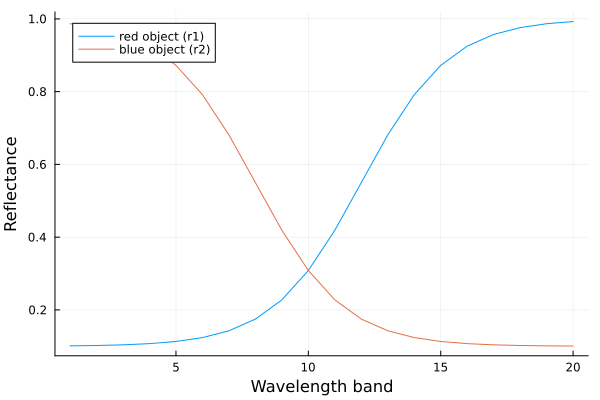

Response under tungsten:
Object 1:[128.45897653560877, 115.034219786723, 15.886436999105527]
Object 2:[145.21762391512573, 198.73679922335182, 127.96802384654875]
Response under sunlight:
Object 1:[179.73213189410578, 187.40810351813457, 48.117844483169876]
Object 2:[304.66476949342484, 443.1787663464333, 386.0233660358369]


In [14]:
λ = 1:20  # wavelength bands

# red-ish object: high reflectance at long λ, low at short λ
r1 = @. 0.1 + 0.9 / (1 + exp(-0.6*(λ - 12)))

# blue-ish object: high reflectance at short λ, low at long λ
r2 = @. 0.1 + 0.9 / (1 + exp(0.6*(λ - 8)))

p = plot(λ, r1, label="red object (r1)")
plot!(λ, r2, label="blue object (r2)")
xlabel!("Wavelength band")
ylabel!("Reflectance")
display(p)

# now calculate c_tung_1 and c_tung_2 for I_tung, r1 and r2
C_tung1 = A * (I_tung .* r1)
C_tung2 = A *(I_tung .* r2)
# now calculate c_sun and c_sun_2 for I_sun, r1 and r2
C_sun1 = A * (I_sun .* r1)
C_sun2 = A * (I_sun .* r2)

println("Response under tungsten:")
println("Object 1:", C_tung1)
println("Object 2:", C_tung2)

println("Response under sunlight:")
println("Object 1:", C_sun1)
println("Object 2:", C_sun2)

In [16]:

bestdiff = Inf
best_r1 = zeros(20)
best_r2 = zeros(20)

for _ in 1:10_000
    r1 = rand(20)
    r2 = rand(20)
    c_tung1 = A * (I_tung .* r1)
    c_tung2 = A * (I_tung .* r2)
    diff_tung = norm(c_tung1 - c_tung2)
    diff_sun  = norm(A * (I_sun .* r1) - A * (I_sun .* r2))

    if diff_tung < 0.10 && diff_sun > 20
        bestdiff = diff_sun
        best_r1, best_r2 = r1, r2
        break
    end
end

println("Found potential metamers under tungsten:")
println("r1 =", best_r1)
println("r2 =", best_r2)


Found potential metamers under tungsten:
r1 =[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
r2 =[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In this part, two objects were compared with different reflectances, $r_1$ and $r_2$,
under both **tungsten** (reddish) and **sunlight** (broadband) illumination.  
The results show that under tungsten light, the cone responses of the two objects are
different but somewhat closer in magnitude, while under sunlight they differ much more.
This demonstrates that the same pair of objects can appear more similar under one
illumination and more distinct under another.

This happens because the mapping from spectra to cone responses, $A p$,
is **not one-to-one**—many different spectral combinations can produce
similar perceived colors (these are called *metamers*).
Changing the illumination changes how the reflectances interact with
the cone sensitivities, so two objects that look identical under one light
can look different under another.

---

**Conclusion:**  
Beth is correct. Two surfaces that appear identical under a tungsten bulb
can look different when illuminated by sunlight. This is because color
perception depends on both the object’s reflectance and the illumination spectrum.

### **3.260 — Halfspace**

Suppose $a, b \in \mathbb{R}^n$ are two given points.  
Show that the set of points in $\mathbb{R}^n$ that are closer to $a$ than $b$ is a halfspace, i.e.:

$$
\{x \mid \|x - a\| \le \|x - b\|\} = \{x \mid c^T x \le d\}
$$

for appropriate $c \in \mathbb{R}^n$ and $d \in \mathbb{R}$.  
Give $c$ and $d$ explicitly, and draw a picture showing $a$, $b$, $c$, and the halfspace.


### **P3.260 Analysis**

### A Halfspace, $H$, is defined as:
$$
H =  \{x \mid c^T x \le d\}
$$
-  the set of all vectors defined by a vector $x \in \mathbb{R}^n$ such that $c^T x\le d$ 
-  where $c \in \mathbb{R}^n$
-  and d is some scalar

Essentially this just says that there is a plane defined by the inequality of the dot product beteen two vectors $x$ and $c$

For our problem, we want to capture that the distance from $ a \rightarrow x$ is less than the distance from $ b \rightarrow x$
$$ \|x - a\| \le \|x - b\|$$

we can rewrite the magnitude of a vector, $k \in \mathbb{R}^n$ as:
$$ \|k\| = \sqrt{k^T k} $$

So expanding on $ \|x - a\| \le \|x - b\|$:
$$\sqrt{(x-a)^T (x-a)} \le \sqrt{(x-b)^T (x-b)}$$
$$(x-a)^T (x-a) \le (x-b)^T (x-b)$$
And distributing:
$$x^T x - a^T x - x^Ta + a^Ta \le x^T x - b^T x - x^Tb+ b^T b $$
$$ - a^T x - x^Ta + a^Ta \le - b^T x - x^Tb+ b^T b $$
Since $k^Tx = x^Tk$ for any vectors $x, k \in \mathbb{R}^n$
$$ - 2a^T x + a^Ta \le - 2 b^T x + b^T b $$
And rearranging:
$$  (b-a)^T x \le \frac{1}{2}(b^Tb - a^Ta) $$
Now we have something in the form of: $ c^T x \le d$ where:
$$ c^T =  (b-a)^T \rightarrow c =  b-a$$
$$d =  \frac{1}{2}(b^Tb - a^Ta)$$

---
#### Interpretation of $d$ and $c^T$
Okay so the interpretation of this is as follows:
- $d$ represents the squared magnitude difference between $a$ and $b$
- $c$ represents twice the vector difference between $b$ and $a$


In [8]:
### now make the plots for R^2
x = [2.0, 0.750]
#define arbitrary a and b
a = [1.0, 2.0]
b = [2.0, 0.0]

# now lets make our halfspace metrics 
# this function is independent of what n for x, a, b in R^n
function get_halfspace_c_d(a, b)
    c = b - a
    d = 0.5 * (b'*b - a'*a)
    return c, d
end
c, d = get_halfspace_c_d(a, b)
println("A is:", a)
println("B is:", b)
println("C is:", c)
println("d is:", d)

A is:[1.0, 2.0]
B is:[2.0, 0.0]
C is:[1.0, -2.0]
d is:-0.5


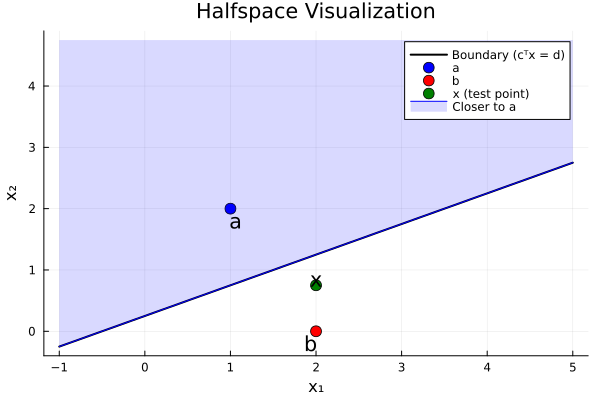

c = [1.0, -2.0]
d = -0.5
Is x inside the halfspace (closer to a)? false


In [9]:
# Define the halfspace line for R²
# Equation: c[1]*x + c[2]*y = d  →  y = (d - c1*x)/c2
x_span = -1.0:0.1:5.0
plane_span = (d .- c[1] .* x_span) ./ c[2]

# Check if x is in the halfspace
in_halfspace = (c' * x <= d)[1]

# Plot
p = plot(x_span, plane_span, label="Boundary (cᵀx = d)", lw=2, color=:black)
scatter!([a[1]], [a[2]], label="a", color=:blue, ms=6)
scatter!([b[1]], [b[2]], label="b", color=:red, ms=6)
scatter!([x[1]], [x[2]], label="x (test point)", color=:green, ms=6)

# Shade the halfspace region (points closer to a than b)
fillrange = maximum(plane_span) .+ 2   
plot!(x_span, plane_span, fillrange=fillrange, fillalpha=0.15,
      color=:blue, label="Closer to a")

# Annotate
annotate!(a[1], a[2] - 0.2, text("a", :left))
annotate!(b[1], b[2] - 0.2, text("b", :right))
annotate!(x[1], x[2] + 0.1, text("x", :center))

title!("Halfspace Visualization")
xlabel!("x₁")
ylabel!("x₂")
aspect_ratio = :equal
#grid!(true)
display(p)
# Print results
println("c = ", c)
println("d = ", d)
println("Is x inside the halfspace (closer to a)? ", in_halfspace)

### **3.300 — Orthogonal Complement of a Subspace**

If $V$ is a subspace of $\mathbb{R}^n$ we define $V^\perp$ as the set of vectors orthogonal to every element in $V$, i.e.,

$$
V^\perp = \{ x \mid \langle x, y \rangle = 0, \; \forall y \in V \}.
$$

**(a)** Verify that $V^\perp$ is a subspace of $\mathbb{R}^n$.

**(b)** Suppose $V$ is described as the span of some vectors $v_1, v_2, \ldots, v_r$.  
Express $V$ and $V^\perp$ in terms of the matrix  
$V = [v_1 \; v_2 \; \cdots \; v_r] \in \mathbb{R}^{n \times r}$  
using common terms (range, nullspace, transpose, etc.).

**(c)** Show that every $x \in \mathbb{R}^n$ can be expressed uniquely as $x = v + v^\perp$  
where $v \in V$, $v^\perp \in V^\perp$.  
*Hint:* Let $v$ be the projection of $x$ on $V$.

**(d)** Show that $\dim(V^\perp) + \dim(V) = n$.

**(e)** Show that $V \subseteq U$ implies $U^\perp \subseteq V^\perp$.


### **P3.300 Analysis**

#### **P3.300 A**
---
Okay so we can denote single vector element of the subspace $V$ as $y$
$$ y \in V \text{ for } V \in \mathbb{R}^n $$
By the definition of the subspace of $\mathbb{R}^n$, we know it must satisfy the following:
$$V \subseteq \mathbb{R}^n, \quad \text{where } V \text{ satisfies: }
\begin{cases}
0 \in V, \\
u, w \in V \implies u + w \in V, \\
u \in V, \; \alpha \in \mathbb{R} \implies \alpha u \in V.
\end{cases}$$
Since we know $V$ is a subspace of $\mathbb{R}^n$, then vectors that are elements of $V$ must also be elements of $\mathbb{R}^n$
Therefore:
$$ y \in \mathbb{R}^n$$
$V$ rather than a set of elements can be expressed as a span of basis vectors, where each basis vector is non-zero and not a scalar multiple of another basis vector, or a linear combination of any two other basis vectors:
$$V = \text{span}\{v_1, v_2, v_3, \ldots, v_m\}$$
Where:
$$ v_i \neq \alpha v_j \text{ for } i \neq j \text{ , } i,j \in [1, m] \text{ and } m\text{, }\alpha \in \mathbb{R}$$
Now diving into the definiton of the orthogonal compliment of a subspace, $V \in \mathbb{R}^n$
We know that $V^\perp$ is defined to be the set or span of vectors that are orthogonal to the set or span of vectors that make up the subspace $V$. Where for $y \in V$ and $x \in V^\perp$:
$$ \langle u, w\rangle =u^Tw = 0$$
This satisfisfies property, that if the dot product of two vectors is zero, then they are orthogonal. Where:
$$ u \cdot w = ||u|| ||w|| cos(\theta_{uw}) $$
So if $cos(\theta_{xy}) = 0$, $\theta_{uw} = \frac{\pi}{2}$, the two vectors are perpendicular and the dot product is zero. Therefore the following must be true:
$$ \sum_{i=1}^{n} u_i w_i = 0 \text{ where } u_i w_i \text{ are elements of singular vectors } u, w \in \mathbb{R}^k$$

Now to show that $V^\perp$ is a subspace we can show the following:
$$ \langle 0, y\rangle = 0 \Rightarrow 0 \text{ vector} \in V^\perp$$
$$\langle u, y\rangle = 0 \text { for all } y \in V$$
$$ \langle u+w, y\rangle = \langle u, y\rangle + \langle w, y\rangle = 0$$
$$ \langle \alpha u, y\rangle = \alpha \langle u, y\rangle = 0 \text{ for any } y \in V \text{ and } \alpha \in \mathbb{R}$$

If all of these assertions hold, and they do, then:
$$ V^T \subseteq \mathbb{R}^n \text{ since } V \subseteq \mathbb{R}^n$$

---
#### **P3.300 B**
---
Now for vector form of the subspace $V \subseteq \mathbb{R}^n$:
We know that:
$$V= [\ v_1, v_2, ... , v_m]\ \text{ for } V \in \mathbb{R}^{n \times m}$$

So with the definiton of a range of a matrix, $A$, we can deduce the range of $V$:
$$\text{Range}(A) = \{x \mid Ax \in \mathbb{R}^m \}$$
Where $Ax$ can be written as:
$$ Ax = x_1 a_1 + x_2 a_2 + ... + x_m a_m$$
Where each $a_i$ is a column of $A$

Then we can say: 
$$\text{range}(V) = \text{span}\{v_1, v_2, ..., v_m\}$$

We can show that the nullspace of \(V^T\) is equal to the orthogonal complement $V^\perp$:

$$
\begin{aligned}
\text{null}(V^T)
&= \{x \in \mathbb{R}^n \mid V^T x = 0\} \\[6pt]
&= \{x \in \mathbb{R}^n \mid v_i^T x = 0, \ \forall i = 1, \ldots, m\} \\[6pt]
&= \{x \in \mathbb{R}^n \mid x^T y = 0, \ \forall y \in \text{span}\{v_1, \ldots, v_m\}\} \\[6pt]
&= \{x \in \mathbb{R}^n \mid x^T y = 0, \ \forall y \in V\} \\[6pt]
&= V^\perp.
\end{aligned}
$$

The nullspace of $V^T$ is the set of all vectors $x$ such that the inner product, $x^Ty = 0$ for all $y \in V$, and therefore null$(V^T)$ is equal to $V^\perp$




---
#### **P3.300 C**
---
So intuitively, we think of the projection of a vector $x$ onto a subspace $V$ as the following; 
- the projection of $x$ onto $V$ is the "shadow" of $x$ on $V$, or the component of $x$ that aligns with $V$
- and the "ray" is the portion of $x$ that is orthogonal to $V$

But we have to show this. Below is the projection equation for a vector onto another vector and the equation for a projection of a vector onto a subspace. 
Vector Projection, where each vector $x,a \in \mathbb{R}^n$:
$$\mathrm{proj}_a(x) = \frac{x^T a}{a^T a} \, a$$
Subspace projection, where $x \in \mathbb{R}^n$ and $V \in \mathbb{R}^{n \times m}$
$$\mathrm{proj}_V(x) = V (V^T V)^{-1} V^T x$$

If we run a dimensionaly decomposition on this, it holds:
- $V \in \mathbb{R}^{n\times m}$
- $V^T \in \mathbb{R}^{m\times n}$
-  $V^TV \in \mathbb{R}^{m\times m}$
-  $(V^TV)^{-1} \in \mathbb{R}^{m \times m}$
-  $V(V^TV)^{-1}V^T \in \mathbb{R}^{n \times n}$
-  $V(V^TV)^{-1}V^Tx \in \mathbb{R}^{n \times 1}$

Since we know $x$ is broken up into its projection on $V$ and orthogonal compliment, we can define the orthogonal compliment, $v^\perp$ as:
$$v^\perp = x - \mathrm{proj}_V(x)$$
$$\text{Or: }v^\perp = (I - V(V^TV)^{-1}V^T) x$$


---
#### **P3.300 D**
---
So we know that $V \subseteq \mathbb{R}^n$
Where we can write the span of $V$ as a $m$ vectors such that $V \in \mathbb{R}^{n\times m}$
The definition of dimensions is as follows

$$
\begin{aligned}
\dim(V)
&= \text{number of linearly independent vectors that span } V \\[6pt]
&= \text{rank}(V) \\[6pt]
&= \text{size of a basis for } V.
\end{aligned}
$$
This basically says if a subspace $V$ is a line, plane or a volume. 

$$\text{rank}(V) = \text{ dimension of column space } = \text{ dim}(V)$$
$$\text{ And from earlier, null}(V^T) = \text{dim}(V^\perp)$$
So from here we can enforce the Rank-Nullity theorem and which is:
$$\text{rank}(V^T) + \text{nullity}(V^T) = n$$
And because:
$$\text{rank}(V^T) = \text{rank}(V)$$
We can then say:
$$\text{dim}(V) + \text{ dim}(V^\perp) = n$$

In natural language we can say that every vector in $\mathbb{R}^n$ by combining the in plane component, dim$(V)$, and the out of plane, orthogonal component, dim$(V^\perp)$.

---
#### **P3.300 E**
---
Lets break down the defenitions:
- $V \subseteq U$ means that every vector in $V$ is also in $U$
- Orthogonal compliment of $U$ is: $U^\perp = \{x \mid x^Ty, \forall y \in U\}$

Now for any $x \in U^\perp$, $x^Ty = 0, \forall y \in U$

But, since $$V \subseteq U \text{, every } v \in V \text{ is also any } y\in U$$

We can then say that: $$x^Tv = 0, \forall v \in V$$

This, therefore means that: $$x \in V^\perp$$
Since $x \in U^\perp$, we can say that all elements of $U^\perp$ are in $V^\perp$:
$$ U^\perp \subseteq V^\perp$$

### **3.450 — Minimum Distance and Maximum Correlation Decoding**

We consider a simple communication system, in which a sender transmits one of $N$ possible signals to a receiver, which receives a version of the signal sent that is corrupted by noise.  
Based on the corrupted received signal, the receiver has to estimate or guess which of the $N$ signals was sent.  
We represent the signals by vectors in $\mathbb{R}^n$.  
We denote the possible signals as $a_1, \ldots, a_N \in \mathbb{R}^n$.  
These signals, which collectively are called the signal constellation, are known to both the transmitter and receiver.  

When the signal $a_k$ is sent, the received signal is:

$$
a_{\text{rec}} = a_k + v,
$$

where $v \in \mathbb{R}^n$ is (channel or transmission) noise.  
In a communications course, the noise $v$ is described by a statistical model, but here we just assume that it is small (and in any case, it does not matter for the problem).  

The receiver must make a guess or estimate as to which of the signals was sent, based on the received signal $a_{\text{rec}}$.  
There are many ways to do this, but in this problem we explore two methods.

- **Minimum distance decoding.**  
Choose as the estimate of the decoded signal the one in the constellation that is closest to what is received, i.e., choose $a_k$ that minimizes $\|a_{\text{rec}} - a_i\|$.

- **Maximum correlation decoding.**  
Choose as the estimate of the decoded signal the one in the constellation that has the largest inner product with the received signal, i.e., choose $a_k$ that maximizes $a_{\text{rec}}^T a_i$.

For both methods, let’s not worry about breaking ties.  
You can assume ties never occur — one of the signals is always closest to, or has maximum inner product with, the received signal.

Give some general conditions on the constellation (i.e., the set of vectors $a_1, \ldots, a_N$) under which these two decoding methods are the same.  
By “same” we mean this: for any received signal $a_{\text{rec}}$, the decoded signal for the two methods is the same.  

Give the simplest condition you can.  
You must show how the decoding schemes always give the same answer, when your conditions hold.  
Also, give a specific counterexample for which your conditions don’t hold, and the methods differ.  
(You don’t need to show that when your conditions don’t hold, the two decoding schemes differ for *some* received signal.)  
You might want to check simple cases like $n = 1$ (scalar signals), $N = 2$ (only two messages in the constellation), or draw some pictures.

### **P3.450 Analysis**

#### **Givens**
---
 - 1 of $N$ possible signals sent
 - Each signal is a vector in $\mathbb{R}^n$
 - Possible signals are one of $[a_1, a_2, ..., a_N] \in \mathbb{R}^n$
 - so the entire signal matrix $A \in \mathbb{R}^{n \times N}$
 - good the signal recieved has noise $v \in \mathbb{R}^n$
#### **Find**
---

- (method 1) minimum distance. Choose $a_k$ such that $||a_{rec} - a_i||$ is minimized
- (method 2) maximum corrrelation. Choose $a_k$ such that $a_{rec}^Ta_i$ is maximized
- Show how decoding schemes always give the same answer, when conditions hold.
- Give an examples where conditions don't hold
- Give simplest condition you can, when method 1 and 2 give the same answer
#### **Assumptions**
---

- no ties for minimum distance
- Do simple cases like, $n=1$ and $N=2$
- 


### Now lets break it down method by method:

#### **Method 1: minimum** $||a_{rec} - a_i||^2$
---

So we want the minimum distance between recieved signal for each column of the signal Matrix $A$. 
$$A \in \mathbb{R}^{n\times N}$$ 
Where: $$ A  = [a_1, a_2, ..., a_N] \in \mathbb{R}^n$$
and $$a_{rec} = a_k + v \text{ for } v\in \mathbb{R}^n \text{ and } k \in [1, N]$$

So the distance between received and guessed, where $i$ is predicted and $k$ is truth, is:
$$\|a_{\text{rec}} - a_i\|^2$$
$$= (a_{\text{rec}} - a_i)^T (a_{\text{rec}} - a_i)$$
$$= a_{\text{rec}}^T a_{\text{rec}} - 2 a_i^T a_{\text{rec}} + a_i^T a_i$$
$$\|a_{\text{rec}} - a_i\|^2 = \|a_{\text{rec}}\|^2 + \|a_i\|^2 - 2 a_i^T a_{\text{rec}}$$

Since $||a_{rec}||^2$ is consistent for all $i \in [1, N]$, we can omit that term from the RHS and are left with:
$$\frac{1}{2} ||a_i||^2 - a_i^Ta_{rec}$$
$$\frac{1}{2}a_i^Ta_i - a_i^Ta_{rec}$$
This is where our policy comes in for selection we want to minimize this:
$$i^* = \arg\min_i ( - 2a_i^T a_{rec} -  \|a_{i}\|^2 )$$
$$i^* = \arg\max_i ( a_i^T a_{rec} - \frac{1}{2} \|a_{i}\|^2 )$$

--- 
Now substitute $a_{\text{rec}} = a_k + v$, so:
$$\|a_{\text{rec}} - a_i\|^2 = (a_k + v)^T(a_k + v) - 2 a_i^T(a_k + v) + a_i^T a_i$$
$$= a_k^T a_k + v^T v + a_i^T a_i + 2a_k^T v - 2a_i^T a_k - 2a_i^T v$$
$$= \|a_k\|^2 + \|v\|^2 + \|a_i\|^2 + 2(a_k^T v - a_i^T a_k - a_i^T v)$$


---
Here is another way to express $\|a_{\text{rec}} - a_i\|^2$:
$$\|a_{\text{rec}} - a_i\|^2 = a_k^T a_k + v^T v + a_i^T a_i + 2a_k^T v - 2a_i^T a_k - 2a_i^T v$$

$$\|a_{\text{rec}} - a_i\|^2 = z^T Q z$$
$$z^T Q z = a_k^T a_k + a_i^T a_i + v^T v + 2a_k^T v - 2a_i^T a_k - 2a_i^T v$$
where:
$$
z =
\begin{bmatrix}
a_k \\[4pt]
a_i \\[4pt]
v
\end{bmatrix},
\qquad
Q =
\begin{bmatrix}
 I & -I &  I \\[4pt]
 -I &  I & -I \\[4pt]
  I & -I &  I
\end{bmatrix}.
$$

---
#### **Method 2: maximum** $a_{rec}^Ta_i$
---
So: $$ a_{rec}^Ta_i = (a_k+v)^Ta_i$$
Then distributing: $$ a_k^Ta_i + v^Ta_i$$
Now the choosing rule bedcomes:
$$i^*=\arg\max_i\; (a_{\mathrm{rec}}^T a_i)$$


---
#### **Evaluating edge conditions:**
If all $\|a_i\|$ are equal (equal-energy constellation), then
$\tfrac12\|a_i\|^2$ is constant in $i$, so
$$
\arg\max_i\Big(a_{\mathrm{rec}}^T a_i - \tfrac12\|a_i\|^2\Big)
=\arg\max_i\;( a_{rec}^T a_i)
$$
i.e., minimum-distance $\equiv$ maximum-correlation.

